In [12]:
# !pip install --upgrade spacy && python -m spacy download en_core_web_trf

In [13]:
#Load the libraries
import numpy as np
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import spacy
import re, string, unicodedata
from tqdm import tqdm 
from spacy.lang.en.stop_words import STOP_WORDS
import os
import warnings
# from text_prep_utils.text_prep import Text_processing_pipeline
nlp = spacy.load('en_core_web_trf')

warnings.filterwarnings('ignore')

In [14]:
# class Text_processing_pipeline():

try:
    nlp = spacy.load('en_core_web_trf') # spacy model
except:
    raise ValueError('spaCy en_core_web_trf model not found.')

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text().lower()
    return text

def text_preprocessor(text, remove_stopwords=True):
    """
    - Lowercase the sentence
    - Change 'm to 'am'
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words
    - Remove trailing whitespace
    - Remove emojis
    """
    s = text

    emoji_clean= re.compile("["
                  u"\U0001F600-\U0001F64F"  # emoticons
                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  "]+", flags=re.UNICODE)

    # Change 'm to 'am'
    s = re.sub(r"\'m", "am", s)
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Removing the square brackets
    s = re.sub('\[[^]]*\]', '', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = re.sub(r'[^a-zA-z0-9\s]','',s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove emojis
    s = emoji_clean.sub(r'',s)

    tokens = [str(t) for t in nlp(s)]

    if remove_stopwords:
        rm_tokens = [w for w in tokens if w not in STOP_WORDS]
        rm_text = " ".join([t for t in rm_tokens])
    else:
        return s

    return rm_text
    
# Stemming the text
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

def lemmatize(text, nlp):
    return (" ".join([w.lemma_ for w in nlp(text)]))

In [15]:
# materials = pd.read_csv(f'/content/drive/MyDrive/aidea_sentiment_analysis/materials/IMDB_Dataset.csv')
materials = pd.read_csv('./materials/IMDB_Dataset.csv')

print(materials.shape)
materials.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


<AxesSubplot:>

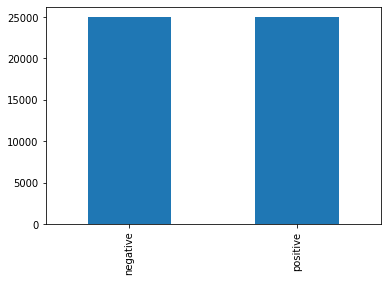

In [16]:
materials['sentiment'].value_counts().plot(kind='bar')

In [17]:
%%time
materials['processed_review'] = materials['review'].apply(lambda x : strip_html(x))


CPU times: user 7.59 s, sys: 16 ms, total: 7.6 s
Wall time: 7.61 s


In [20]:
%%time
materials['processed_review'] = materials['processed_review'].apply(lambda x : text_preprocessor(x, remove_stopwords=False))
# materials['review'] = materials['review'].apply(lambda x : lemmatize(x, nlp))

In [ ]:
materials

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,iam going to have to disagree with the previou...


In [19]:
materials.to_csv('./materials/processed_IMDB_Dataset.csv',index=0)

In [21]:
materials.sentiment = materials.sentiment.apply(lambda x : 1 if x == 'positive' else 0)

In [22]:
materials

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,"petter mattei's ""love in the time of money"" is..."
...,...,...,...
49995,I thought this movie did a down right good job...,1,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,0,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,0,i'm going to have to disagree with the previou...


In [23]:
materials.to_csv('./materials/processed_IMDB_Dataset.csv',index=0)